# Le Titanic : Partie 2, préparation des données

## Lecture des données

In [1]:
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

In [2]:
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
# SeaBorn : librairie de graphiques avancés
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Lecture des données d'apprentissage et de test
titanic = pd.read_csv("titanic.csv")

In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,homedest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Interprétation des paramètres (rappel)

## Conditionnement des données

In [5]:
# On élimine les colonnes non pertinentes pour la prédiction
titanic = titanic.drop(['name', 'ticket', 'cabin','boat','body','homedest'], axis=1)

### Données manquantes

In [6]:
titanic.count()

pclass      1309
survived    1309
sex         1309
age         1046
sibsp       1309
parch       1309
fare        1308
embarked    1307
dtype: int64

On voit qu'il manque des données, en particulier pour la colonne *'age'*  
Il existe plusieurs approches pour compléter les données manquantes :  
- **suppression** des données manquantes (par exemple avec la fonction *dropna*). C'est une méthode simple, mais qui élimine de l'information
- **remplacement** des données manquantes. Par exemple, on pourrait remplacer les informations manquantes pour l'âge par la moyenne de la colonne (mais on introduit un biais sur cette valeur), ou par un nombre aléatoire généré par une loi normale de même moyenne et variance ...
- **estimation** des paramètres manquants avec une méthode de prédiction (par exemple avec une régression)

La fonction *fillna* permet de compléter simplement les paramètres manquants. L'option *method='pad'* permet d'utiliser la précédente valeur non manquante :

In [7]:
titanic = titanic.fillna(method='pad')

In [8]:
titanic.count()

pclass      1309
survived    1309
sex         1309
age         1309
sibsp       1309
parch       1309
fare        1309
embarked    1309
dtype: int64

On a bien complété les valeurs manquantes

(array([25., 12.,  7., 10.,  6.,  6.,  4.,  6., 14.,  4.,  5.,  4.,  5.,
         8., 18., 27., 27., 42., 42., 24., 48., 64., 30., 59., 53., 36.,
        44., 38., 39., 46., 31., 32., 39., 24., 33., 36., 14., 16., 28.,
        18., 17., 21., 11., 17., 33., 10., 19., 20., 12., 15.,  8.,  7.,
         4., 10.,  9.,  6.,  8.,  6.,  3.,  7., 12.,  5.,  5.,  5.,  3.,
         2.,  1.,  0.,  0.,  2.,  3.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  2.]),
 array([ 0.1667    ,  1.16461625,  2.1625325 ,  3.16044875,  4.158365  ,
         5.15628125,  6.1541975 ,  7.15211375,  8.15003   ,  9.14794625,
        10.1458625 , 11.14377875, 12.141695  , 13.13961125, 14.1375275 ,
        15.13544375, 16.13336   , 17.13127625, 18.1291925 , 19.12710875,
        20.125025  , 21.12294125, 22.1208575 , 23.11877375, 24.11669   ,
        25.11460625, 26.1125225 , 27.11043875, 28.108355  , 29.10627125,
        30.1041875 , 31.10210375, 32.10002   , 33.09793625, 34.0958525 ,
        35.09376875, 36.091685 

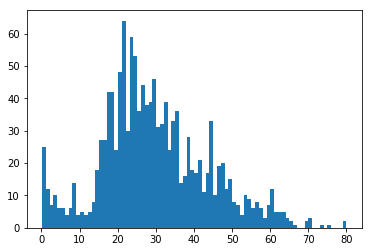

In [10]:
plt.hist(titanic.age, bins=80)

La distribution des âges n'est pas significativement modifiée ...

### Mise à l'échelle des données quantitatives

In [11]:
titanic[['age','fare']].describe()

,age,fare
count,1309.000000,1309.000000
mean,30.027820,33.276193
std,14.064854,51.743584
min,0.166700,0.000000
25%,21.000000,7.895800
50%,28.000000,14.454200
75%,39.000000,31.275000
max,80.000000,512.329200


(array([ 25.,  19.,  10.,  12.,  10.,  14.,   9.,   4.,  25.,  33.,  27.,
         84.,  25., 112.,  88.,  53.,  80.,  42.,  85.,  59.,  39.,  57.,
         38.,  28.,  46.,  17.,  32.,  17.,  43.,  39.,  12.,  23.,   7.,
         14.,  15.,   8.,   9.,   8.,  16.,  10.,   3.,   3.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   2.]),
 array([ 0.1667  ,  1.763366,  3.360032,  4.956698,  6.553364,  8.15003 ,
         9.746696, 11.343362, 12.940028, 14.536694, 16.13336 , 17.730026,
        19.326692, 20.923358, 22.520024, 24.11669 , 25.713356, 27.310022,
        28.906688, 30.503354, 32.10002 , 33.696686, 35.293352, 36.890018,
        38.486684, 40.08335 , 41.680016, 43.276682, 44.873348, 46.470014,
        48.06668 , 49.663346, 51.260012, 52.856678, 54.453344, 56.05001 ,
        57.646676, 59.243342, 60.840008, 62.436674, 64.03334 , 65.630006,
        67.226672, 68.823338, 70.420004, 72.01667 , 73.613336, 75.210002,
        76.806668, 78.403334, 80.      ]),
 <a list of 50 Patch ob

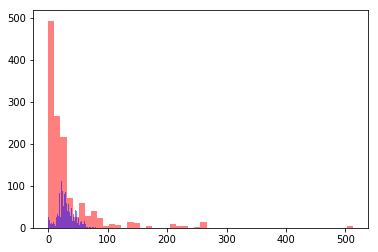

In [12]:
plt.hist(titanic.fare, bins=50, color='red', alpha=0.5)
plt.hist(titanic.age, bins=50, color='blue', alpha=0.5)

On voit qu'il y a une forte différente de distribution entre les deux séries.  
Certains algorithmes demandent une distribution normalisée. Pour une discussion détaillée sur ce sujet, cf par exemple :  
http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html  
http://scikit-learn.org/stable/modules/preprocessing.html

La librairie *sklearn* comporte une librairie de prétraitement des données

In [13]:
from sklearn import preprocessing

In [14]:
scaler = preprocessing.StandardScaler()
titanic[['age', 'fare']] = scaler.fit_transform(titanic[['age', 'fare']])

(array([ 25.,  19.,  10.,  12.,  10.,  14.,   9.,   4.,  25.,  33.,  27.,
         84.,  25., 112.,  88.,  53.,  80.,  42.,  85.,  59.,  39.,  57.,
         38.,  28.,  46.,  17.,  32.,  17.,  43.,  39.,  12.,  23.,   7.,
         14.,  15.,   8.,   9.,   8.,  16.,  10.,   3.,   3.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   2.]),
 array([-2.1239135 , -2.01034842, -1.89678334, -1.78321827, -1.66965319,
        -1.55608811, -1.44252303, -1.32895795, -1.21539287, -1.10182779,
        -0.98826272, -0.87469764, -0.76113256, -0.64756748, -0.5340024 ,
        -0.42043732, -0.30687224, -0.19330717, -0.07974209,  0.03382299,
         0.14738807,  0.26095315,  0.37451823,  0.48808331,  0.60164838,
         0.71521346,  0.82877854,  0.94234362,  1.0559087 ,  1.16947378,
         1.28303885,  1.39660393,  1.51016901,  1.62373409,  1.73729917,
         1.85086425,  1.96442933,  2.0779944 ,  2.19155948,  2.30512456,
         2.41868964,  2.53225472,  2.6458198 ,  2.75938488,  2.87294995,
 

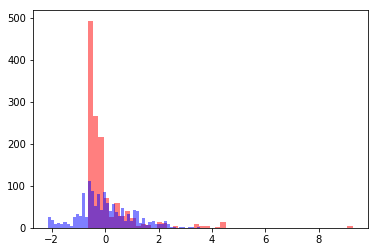

In [15]:
plt.hist(titanic.fare, bins=50, color='red', alpha=0.5)
plt.hist(titanic.age, bins=50, color='blue', alpha=0.5)

### Encodage binaire des données qualitatives

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null object
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
embarked    1309 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


La plupart des algorithmes ont besoin de données numériques, et n'acceptent pas les chaînes de caractères :

In [17]:
titanic.sex = titanic.sex.map({"male":0, "female":1})

On utilise la fonction *get_dummies* de Pandas pour transformer les colonnes multimodales (par exemple 'embarked') en plusieurs colonnes binaires (par exemple 'embarked_C' dont les valeurs sont 1 si le passager a embarqué à Cherbourg et 0 sinon) :

In [18]:
titanic = pd.get_dummies(data=titanic, columns=['pclass', 'embarked'])

In [19]:
titanic.head()

,survived,sex,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S
0,1,1,-0.073105,0,0,3.442540,1,0,0,0,0,1
1,1,0,-2.070569,1,2,2.286641,1,0,0,0,0,1
2,0,1,-1.993518,1,2,2.286641,1,0,0,0,0,1
3,0,0,-0.001979,1,2,2.286641,1,0,0,0,0,1
4,0,1,-0.357611,1,2,2.286641,1,0,0,0,0,1


## Création des jeux d'apprentissage et de test

On sépare le dataset en deux parties :
- un ensemble d'apprentissage (entre 70% et 90% des données), qui va permettre d'entraîner le modèle
- un ensemble de test (entre 10% et 30% des données), qui va permettre d'estimer la pertinence de la prédiction

In [20]:
data_train = titanic.sample(frac=0.8)          # 80% des données avec frac=0.8
data_test = titanic.drop(data_train.index)     # le reste des données pour le test

In [21]:
# On peut sauvegarder cet échantillonnage sous la forme de fichiers, 
# de manière à éviter une variabilité des résultats due au choix aléatoire

data_train.to_csv('titanic_train.csv', index=False)
data_test.to_csv('titanic_test.csv', index=False)

In [22]:
# On peut utiliser les fichiers fournis pour avoir une base équitable
data_train = pd.read_csv('titanic_train0.csv')
data_test = pd.read_csv('titanic_test0.csv')
data_train.head()

,survived,sex,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S
0,0,0,-0.642116,0,0,-0.490691,0,0,1,0,0,1
1,0,0,0.140274,0,0,-0.493509,0,0,1,0,1,0
2,1,1,-0.428737,3,2,4.441355,1,0,0,0,0,1
3,0,0,0.175837,0,0,3.445682,1,0,0,1,0,0
4,1,1,-1.566759,1,1,-0.140674,0,1,0,0,0,1


On sépare les données d'apprentissage (*X_train*) et la cible (*Y_train*, la colonnes des données *survived*)

In [23]:
X_train = data_train.drop(['survived'], axis=1)
Y_train = data_train.survived
X_test = data_test.drop(['survived'], axis=1)
Y_test = data_test.survived

In [24]:
print(X_train.shape)
print(X_test.shape)

(1047, 11)
(262, 11)


In [76]:
from sklearn import ensemble, metrics

rf = ensemble.RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_rf = rf.predict(X_test)
rf_score = metrics.accuracy_score(Y_test, Y_rf)
print(rf_score)

0.8206106870229007


Text(0.5,1,'Importance des caracteristiques')

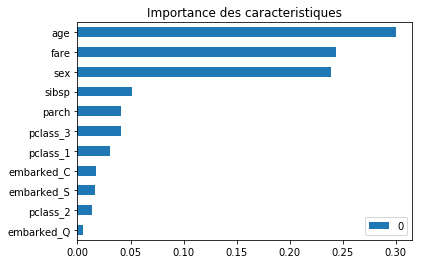

In [77]:
rf.feature_importances_
importances = list(zip(rf.feature_importances_, X_train.columns))
importances.sort(reverse=False)
plt.figure(figsize=(12,10))
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'barh')
plt.title('Importance des caracteristiques')